<img src="./images/op-amp.png">

The amplification happens on pins 5,6, and 7 of the op-amp in the circuit above.  Looking at this part of the circuit, we see that the op-amp is in a standard 'non-inverted amplifier' configuration:

<img src="https://upload.wikimedia.org/wikipedia/commons/6/66/Operational_amplifier_noninverting.svg">

(Image is from a Wikipedia entry on [op-amps](https://en.wikipedia.org/wiki/Operational_amplifier).)

Our sinusoidal input comes into the amplifier as $V_{in}$ on pin 5; and the amplified output $V_{out}$ on pin 7 is given by:

$$V_{out}=G*V_{in}$$

where $G$ is the gain of the amplifier, and is predicted to be:

$$G = 1 + \frac{R_f}{R_g}$$

Where $R_f$ = "R9" in our circuit diagram above, and $R_g$ is the resistance provided by the probe in the water.  


In this initial experiment, we used $R_f=$ 4.67 KOhms. 

In [1]:
%matplotlib inline 
# above line allows for showing plots in a cell easily
import matplotlib # the main plotting library
import numpy as np # allows for arrays
import matplotlib.pyplot as plt # getting specific plotting functions
import urllib # URL import functions
import pandas as pd # nice data utilities

Read in the experimental values ... 

In [176]:
q=pd.read_table('./data/wien_test_2016_02_13.csv', header=0,sep=',',names=['Rg','Venv','Vout']);
p=q.sort_values(['Rg'], ascending=[1]);rg_exp=p.Rg*1000

Generate the theoretical curve ...

In [177]:
Rf=46670
Rg = np.linspace(500, 5500, 100)  # 1 .. 430 kOhms
V_in=0.053  
V_out = V_in*(1+(Rf/Rg))

Plot ...

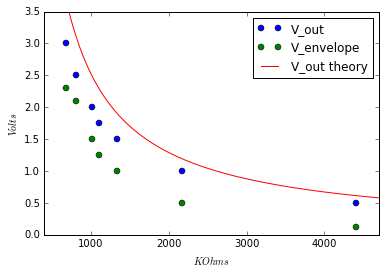

In [181]:
plt.plot(p.Rg*1000,p.Vout,'o',label='V_out');

plt.plot(p.Rg*1000,p.Venv,'o', label='V_envelope');

plt.plot(Rg,V_out, label='V_out theory');
plt.xlabel('$KOhms$')
plt.ylabel('$Volts$')
plt.ylim(0,3.5);
plt.xlim(400,4700);
plt.legend()

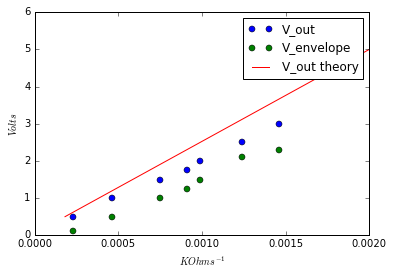

In [182]:
plt.plot(1/(p.Rg*1000),p.Vout,'o',label='V_out');
plt.plot(1/(p.Rg*1000),p.Venv,'o', label='V_envelope');
plt.plot(1/Rg,V_out, label='V_out theory');
plt.xlabel('$KOhms^{-1}$');
plt.ylabel('$Volts$')
plt.legend()

Discrepancy between V_out_theory and V_out is likely due to an offset / bias in the op-amp itself.  See, for example:

- http://www.ti.com/lit/an/sloa059/sloa059.pdf
- http://www.analog.com/media/en/training-seminars/tutorials/MT-037.pdf?doc=CN0326.pdf
- http://www.allaboutcircuits.com/textbook/semiconductors/chpt-8/op-amp-practical-considerations/

This offset is likley not worrisome, as it should be consistent for a given device, and won't prevent calibration.

The difference between V_envelope and V_out is expected, and is due to the diode + RC filter circuit.  This offset likewise will not affect calibration. 
